In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import implicit
import scipy
import json
import gzip
from datetime import datetime

In [2]:
movies_file = "Movies_and_TV.json.gz"
music_file = "Digital_Music.json.gz"

In [3]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path, count=None):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
    if count is not None and i == count:
      break
  return pd.DataFrame.from_dict(df, orient='index')

In [4]:
music = getDF(music_file)
music = music.astype({"overall": int}).drop("reviewTime", axis=1)
# music.reviewTime = pd.to_datetime(music.reviewTime)
music.unixReviewTime = pd.to_datetime(music.unixReviewTime, unit="s")
music.image.fillna("no image", inplace=True)
music["style"] = music["style"].apply(lambda x: json.loads("{ }") if x is np.NaN else x)
music["format"] = music["style"].apply(lambda x: " Unknown" if "Format:" not in x else x["Format:"])
music.vote = pd.to_numeric(music.vote, errors="coerce").fillna(0).astype(int)

music = music.drop_duplicates(subset=["reviewerID", "asin"], keep='last')

print(music.isna().sum())
music.fillna("", inplace=True)
print(music.dtypes)
music

overall              0
verified             0
reviewerID           0
asin                 0
style                0
reviewerName        78
reviewText        1417
summary            521
unixReviewTime       0
vote                 0
image                0
format               0
dtype: int64
overall                    int64
verified                    bool
reviewerID                object
asin                      object
style                     object
reviewerName              object
reviewText                object
summary                   object
unixReviewTime    datetime64[ns]
vote                       int64
image                     object
format                    object
dtype: object


,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,format
0,5,True,A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,2013-12-22,0,no image,Audio CD
1,5,True,AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,2013-09-11,0,no image,Audio CD
2,5,True,A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,2013-03-02,0,no image,Audio CD
3,5,True,A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,2012-12-02,0,no image,Audio CD
4,5,False,A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,2012-01-07,6,no image,Audio CD
...,...,...,...,...,...,...,...,...,...,...,...,...
1584077,5,True,AR3KABMPL5L0O,B01HJ91P94,{'Format:': ' MP3 Music'},Shar Solis,Casting Crowns....you do it so well! Awesome s...,Awesome song!,2018-03-03,0,no image,MP3 Music
1584078,4,True,A2N53GHW73INDH,B01HJ91P94,{'Format:': ' MP3 Music'},PEANUT,This band has produced many inspiring Christia...,This song in particular speaks about what it's...,2018-01-24,0,no image,MP3 Music
1584079,5,True,ABNKLDCCVJKW1,B01HJ91P94,{'Format:': ' MP3 Music'},Alex,Awesome band and awesome song. This is my next...,Five Stars,2017-04-21,0,no image,MP3 Music
1584080,5,True,AMWSDABZWFRAT,B01HJ91IVY,{'Format:': ' MP3 Music'},sara cabuag,Excellent,Five Stars,2018-02-23,0,no image,MP3 Music


In [5]:
movies = getDF(movies_file)  # , count=2000000)
movies = movies.astype({"overall": int}).drop("reviewTime", axis=1)
# movies.reviewTime = pd.to_datetime(movies.reviewTime)
movies.unixReviewTime = pd.to_datetime(movies.unixReviewTime, unit="s")
movies.image.fillna("no image", inplace=True)
movies["style"] = movies["style"].apply(lambda x: json.loads("{ }") if x is np.NaN else x)
movies["format"] = movies["style"].apply(lambda x: " Unknown" if "Format:" not in x else x["Format:"])
movies.vote = pd.to_numeric(movies.vote, errors="coerce").fillna(0).astype(int)

movies = movies.drop_duplicates(subset=["reviewerID", "asin"], keep='last')

print(movies.isna().sum())
movies.fillna("", inplace=True)
print(movies.dtypes)
movies

overall              0
verified             0
reviewerID           0
asin                 0
style                0
reviewerName       258
reviewText        7833
summary           2138
unixReviewTime       0
vote                 0
image                0
format               0
dtype: int64
overall                    int64
verified                    bool
reviewerID                object
asin                      object
style                     object
reviewerName              object
reviewText                object
summary                   object
unixReviewTime    datetime64[ns]
vote                       int64
image                     object
format                    object
dtype: object


,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,format
0,5,True,A3478QRKQDOPQ2,0001527665,{'Format:': ' VHS Tape'},jacki,really happy they got evangelised .. spoiler a...,great,2013-03-11,0,no image,VHS Tape
1,5,True,A2VHSG6TZHU1OB,0001527665,{'Format:': ' Amazon Video'},Ken P,Having lived in West New Guinea (Papua) during...,Realistic and Accurate,2013-02-18,3,no image,Amazon Video
2,5,False,A23EJWOW1TLENE,0001527665,{'Format:': ' Amazon Video'},Reina Berumen,Excellent look into contextualizing the Gospel...,Peace Child,2013-01-17,0,no image,Amazon Video
3,5,True,A1KM9FNEJ8Q171,0001527665,{'Format:': ' Amazon Video'},N Coyle,"More than anything, I've been challenged to fi...",Culturally relevant ways to share the love of ...,2013-01-10,0,no image,Amazon Video
4,4,True,A38LY2SSHVHRYB,0001527665,{'Format:': ' Amazon Video'},Jodie Vesely,This is a great movie for a missionary going i...,Good Movie! Great for cross-cultural missionar...,2012-12-26,0,no image,Amazon Video
...,...,...,...,...,...,...,...,...,...,...,...,...
8765563,5,False,A29XKBB6SEYTN6,B01HJ6R77G,{'Format:': ' DVD'},Tommy Dooley,Set in a non existent country we meet El Presi...,A Great Polemic against dictators everywhere.,2017-04-12,0,no image,DVD
8765564,4,False,ASEBX8TBYWQWA,B01HJ6R77G,{'Format:': ' DVD'},Steve Ramm,This 2014 film is just being released on DVD i...,Georgian-French film by Iranian Director is a ...,2016-08-30,0,no image,DVD
8765565,1,True,AK4XZBLSY1WC9,B01HJCCLOY,{},John R. Norene,Instead of dealing with the legend in a manner...,Poorly done,2017-05-24,0,no image,Unknown
8765566,3,True,AK19IXB9I4175,B01HJCCLOY,{},GJR,"My review is of the technical aspects of ""She....","No Chapters, No Subtitles, No Extras",2017-04-13,0,no image,Unknown


<AxesSubplot:>

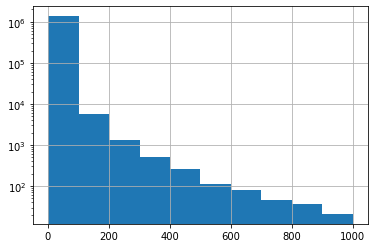

In [6]:
movies.loc[movies.vote != 0,"vote"].hist(log=True)

<AxesSubplot:>

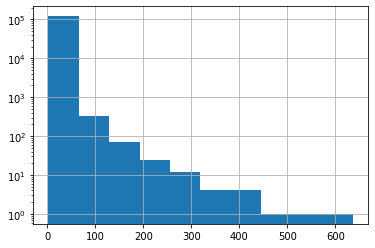

In [7]:
music.loc[music.vote != 0,"vote"].hist(log=True)

In [8]:
uniques = np.unique(movies["format"], return_counts=True)
formats = {k: f"{v / movies.shape[0]:.5f}" for k, v in zip(uniques[0],uniques[1])}
dict(sorted(formats.items(), key=lambda item: item[1], reverse=True))

{' DVD': '0.42108',
 ' Amazon Video': '0.36354',
 ' Blu-ray': '0.08037',
 ' Prime Video': '0.06464',
 ' Unknown': '0.04929',
 ' VHS Tape': '0.01879',
 ' HD DVD': '0.00042',
 ' DVD-R': '0.00040',
 ' Audio CD': '0.00036',
 ' DVD-ROM': '0.00019',
 ' Theatrical Release': '0.00017',
 ' UMD for PSP': '0.00010',
 ' Amazon Instant Video': '0.00007',
 ' Electronics': '0.00006',
 ' Hardcover': '0.00006',
 ' Interactive DVD': '0.00006',
 ' Paperback': '0.00006',
 ' Toy': '0.00006',
 ' DVD Audio': '0.00004',
 ' Kindle Edition': '0.00004',
 ' MP3 Music': '0.00004',
 ' CD-ROM': '0.00002',
 ' Laser Disc': '0.00002',
 ' Staple Bound': '0.00002',
 ' Baby Product': '0.00001',
 ' Kindle Edition with Audio/Video': '0.00001',
 ' Kitchen': '0.00001',
 ' Misc.': '0.00001',
 ' Unknown Binding': '0.00001',
 ' Video CD': '0.00001',
 ' Vinyl': '0.00001',
 ' 3.5" and 5.25" disks': '0.00000',
 ' 5.25" disk': '0.00000',
 ' Accessory': '0.00000',
 ' Apparel': '0.00000',
 ' Audible Audiobook': '0.00000',
 ' Audio Cas

In [9]:
uniques = np.unique(music["format"], return_counts=True)
formats = {k: f"{v / music.shape[0]:.5f}" for k, v in zip(uniques[0],uniques[1])}
dict(sorted(formats.items(), key=lambda item: item[1], reverse=True))

{' MP3 Music': '0.62254',
 ' Audio CD': '0.18552',
 ' Unknown': '0.17239',
 ' Vinyl': '0.01777',
 ' DVD': '0.00059',
 ' Audio Cassette': '0.00053',
 ' DVD Audio': '0.00018',
 ' Amazon Video': '0.00011',
 ' Blu-ray Audio': '0.00011',
 ' Blu-ray': '0.00009',
 ' Paperback': '0.00005',
 ' Hardcover': '0.00003',
 ' CD-ROM': '0.00001',
 ' Kindle Edition': '0.00001',
 ' USB Memory Stick': '0.00001',
 ' Vinyl Bound': '0.00001',
 ' Accessory': '0.00000',
 ' Apparel': '0.00000',
 ' Audible Audiobook': '0.00000',
 ' CD Video': '0.00000',
 ' CD-R': '0.00000',
 ' Calendar': '0.00000',
 ' DVD-ROM': '0.00000',
 ' Grocery': '0.00000',
 ' Health and Beauty': '0.00000',
 ' Home': '0.00000',
 ' Kitchen': '0.00000',
 ' Laser Disc': '0.00000',
 ' MP3 CD': '0.00000',
 ' Mass Market Paperback': '0.00000',
 ' Misc. Supplies': '0.00000',
 ' Office Product': '0.00000',
 ' Perfect Paperback': '0.00000',
 ' Personal Computers': '0.00000',
 ' Prime Video': '0.00000',
 ' Spiral-bound': '0.00000',
 ' Unbound': '0.00

[5 4 1 3 2]


<AxesSubplot:>

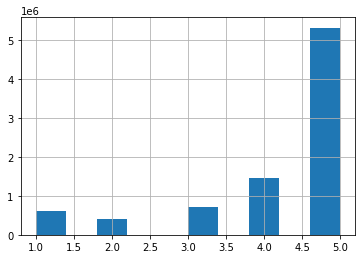

In [10]:
print(movies.overall.unique())
movies.overall.hist()

In [11]:
music_reviewers = set(music.reviewerID.values)
movie_reviewers = set(movies.reviewerID.values)
print(f"Movie users: {len(movie_reviewers)}")
print(f"Music users: {len(music_reviewers)}")
in_movies_from_music = movies.loc[movies.reviewerID.apply(lambda x: x in music_reviewers),:]
in_music_from_movies = music.loc[music.reviewerID.apply(lambda x: x in movie_reviewers),:]
cross_reviewers = set(in_music_from_movies.reviewerID.values)
print(f"Cross users: {len(cross_reviewers)}")
print(f"{len(in_movies_from_music.reviewerID.unique()) / len(movie_reviewers) * 100:.3f}% of movie reviewers")
print(f"{len(in_movies_from_music.reviewerID.unique()) / len(music_reviewers) * 100:.3f}% of music reviewers")
in_music_from_movies

Movie users: 3826085
Music users: 840372
Cross users: 260039
6.796% of movie reviewers
30.943% of music reviewers


,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,format
0,5,True,A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,2013-12-22,0,no image,Audio CD
2,5,True,A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,2013-03-02,0,no image,Audio CD
3,5,True,A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,2012-12-02,0,no image,Audio CD
4,5,False,A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,2012-01-07,6,no image,Audio CD
7,5,False,AT7OB43GHKIUA,0001388703,{'Format:': ' Audio CD'},William G. Simon,Keith Green is a bit of legend in some Christi...,"Heartfelt, Passionate and Funny - Green is Mas...",2008-05-04,10,no image,Audio CD
...,...,...,...,...,...,...,...,...,...,...,...,...
1584061,4,False,ALQ12GYW884EJ,B01HJ90892,{'Format:': ' MP3 Music'},Manuel Grosso Galvan,Lives concerts in Europe in 2011. Great materi...,"Great material, both musician are really good ...",2016-09-20,0,no image,MP3 Music
1584064,5,True,A1K0WGNA0PRPJ0,B01HJ8ZXRK,{'Format:': ' MP3 Music'},Retired Mom,Her music is inspiring and uplifting -great ta...,Must have,2016-08-21,2,no image,MP3 Music
1584072,5,True,A10AMVCF9YOWHL,B01HJ904F0,{'Format:': ' MP3 Music'},Dark McGwire,This is very good music!! Takes me back to the...,Five Stars,2016-11-15,0,no image,MP3 Music
1584078,4,True,A2N53GHW73INDH,B01HJ91P94,{'Format:': ' MP3 Music'},PEANUT,This band has produced many inspiring Christia...,This song in particular speaks about what it's...,2018-01-24,0,no image,MP3 Music


In [12]:
movie_items = set(movies.asin.values)
music_items = set(music.asin.values)
print(f"Movie items: {len(movie_items)}")
print(f"Music items: {len(music_items)}")

Movie items: 182032
Music items: 456992


In [13]:
only_movie_reviewers_id = movie_reviewers.difference(cross_reviewers)
only_movie_reviewers_matrix = movies.loc[[True if reviewer in only_movie_reviewers_id else False for reviewer in movies.reviewerID], :]
only_movie_reviewers_map = {val: i for i, val in enumerate(only_movie_reviewers_id)}
movie_items_map = {val: i for i, val in enumerate(movie_items)}
MoX = scipy.sparse.csr_matrix((only_movie_reviewers_matrix.overall,
                              ([only_movie_reviewers_map[elem] for elem in only_movie_reviewers_matrix.reviewerID],
                               [movie_items_map[elem] for elem in only_movie_reviewers_matrix.asin])),
                              dtype=np.uint8,
                              shape=(len(only_movie_reviewers_id), len(movie_items) + len(music_items)))
MoX

<3566046x639024 sparse matrix of type '<class 'numpy.uint8'>'
	with 7141833 stored elements in Compressed Sparse Row format>

In [14]:
only_music_reviewers_id = music_reviewers.difference(cross_reviewers)
only_music_reviewers_matrix = music.loc[[True if reviewer in only_music_reviewers_id else False for reviewer in music.reviewerID], :]
only_music_reviewers_map = {val: i for i, val in enumerate(only_music_reviewers_id)}
music_items_map = {val: i for i, val in enumerate(music_items)}
MuX = scipy.sparse.csr_matrix((only_music_reviewers_matrix.overall,
                              ([only_music_reviewers_map[elem] for elem in only_music_reviewers_matrix.reviewerID],
                               [len(movie_items) + music_items_map[elem] for elem in only_music_reviewers_matrix.asin])),
                              dtype=np.uint8,
                              shape=(len(only_music_reviewers_id), len(movie_items) + len(music_items)))
MuX

<580333x639024 sparse matrix of type '<class 'numpy.uint8'>'
	with 877502 stored elements in Compressed Sparse Row format>

In [15]:
cross_reviewers_movie_matrix = movies.loc[[True if reviewer in cross_reviewers else False for reviewer in movies.reviewerID], :]
cross_reviewers_music_matrix = music.loc[[True if reviewer in cross_reviewers else False for reviewer in music.reviewerID], :]
cross_reviewers_map = {val: i for i, val in enumerate(cross_reviewers)}
CrMoX = scipy.sparse.csr_matrix((cross_reviewers_movie_matrix.overall,
                                ([cross_reviewers_map[elem] for elem in cross_reviewers_movie_matrix.reviewerID],
                                 [movie_items_map[elem] for elem in cross_reviewers_movie_matrix.asin])),
                                dtype=np.uint8,
                                shape=(len(cross_reviewers), len(movie_items)))
CrMuX = scipy.sparse.csr_matrix((cross_reviewers_music_matrix.overall,
                                ([cross_reviewers_map[elem] for elem in cross_reviewers_music_matrix.reviewerID],
                                 [music_items_map[elem] for elem in cross_reviewers_music_matrix.asin])),
                                dtype=np.uint8,
                                shape=(len(cross_reviewers), len(music_items)))
CrX = scipy.sparse.hstack([CrMoX, CrMuX]).tocsr()
CrX

<260039x639024 sparse matrix of type '<class 'numpy.uint8'>'
	with 2004065 stored elements in Compressed Sparse Row format>

In [16]:
# X = scipy.sparse.vstack([MoX, MuX, CrX])
X = CrX
print(set(X.data))  # Must be [1, 5]
X

{1, 2, 3, 4, 5}


<260039x639024 sparse matrix of type '<class 'numpy.uint8'>'
	with 2004065 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.model_selection import ShuffleSplit
random_state = 12345

split = ShuffleSplit(n_splits=1, train_size=0.25, random_state=random_state)
for train, test in split.split(X):
    X_train_part = scipy.sparse.hstack([CrMoX[train], scipy.sparse.csr_matrix((train.shape[0], CrMuX.shape[1]))]).tocsr()
    X_test_part = X[test]
    X_train = scipy.sparse.vstack([X_train_part, X_test_part]).tocsr()  # The whole matrix without 25% of music part
    X_test = CrMuX[train]                                               # 25% of music part (also sparse)
X_train


<260039x639024 sparse matrix of type '<class 'numpy.float64'>'
	with 1845473 stored elements in Compressed Sparse Row format>